In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split


In [7]:
### multi-class classification 
# Binary classification = one thing or another (e.g. cat vs dog)
# Multi-class classification = more than two classes (e.g. cat vs dog vs bird)

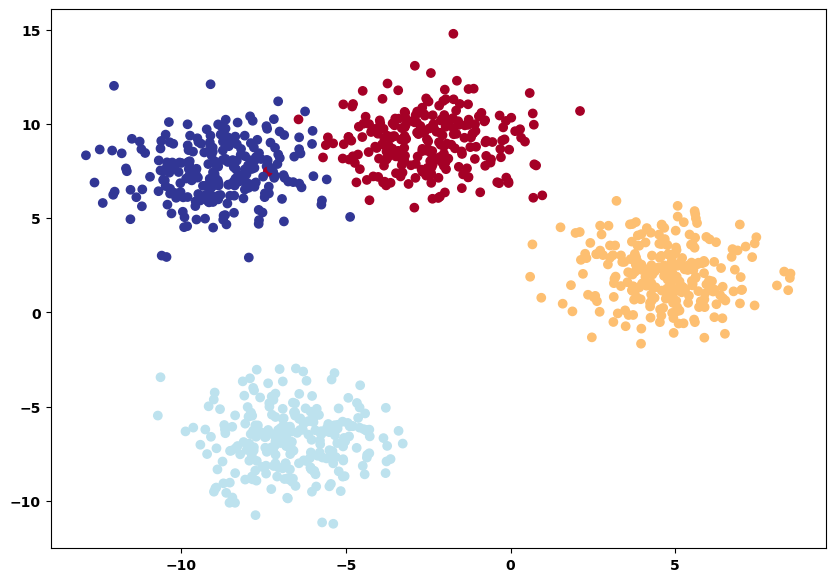

In [ ]:
# set hyperparameters  for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


# 1. Create multi-class dataset
a = make_blobs()
X_blob, y_blob = make_blobs(n_samples=1000, 
                            centers=NUM_CLASSES, 
                            n_features=NUM_FEATURES,
                            cluster_std=1.5, # give the clausters a little shake up
                            random_state=RANDOM_SEED)

# 2. turn data into tensor

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# Split into train and test

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                         y_blob,
                                                                         test_size=0.2, 
                                                                         random_state=RANDOM_SEED)


# plot data (visualize)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1],
            c=y_blob, 
            cmap= plt.cm.RdYlBu)

In [ ]:
### Building a multi-class classification model in PyTorch
## Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [15]:
## Build a multi_class classification

class BlobModel(nn.Module):
    def __init__(self, input_feature, output_feature, hidden_units= 8):
        """
        Initialize multi-class classification model.

        Args:
            input_feature (int): Number of input features.
            output_feature (int): Number of output features (classes).
            hidden_units (int, optional): Number of hidden units. Defaults to 8.
        Returns:
            
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_feature, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_feature)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)
    
## Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_feature=2, 
                    output_feature=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)